# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [8]:
import mechanize

In [9]:
%matplotlib inline
import requests
import bs4
from bs4 import BeautifulSoup
import pandas
import matplotlib 


In [10]:
## YOUR CODE HERE




Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it
    - Remember to use `try/except` if you anticipate errors
- **Test** the functions on the results above and simple examples

In [11]:
## YOUR CODE HERE
def extract_text(el):
    if el:
        return el.text.strip()
    else:
        return ''      

def get_company_from_result(result):
    return extract_text(result.find('span', {'class' : 'company'}))

def get_location_from_result(result):
    return extract_text(result.find('span', {'class' : 'location'}))

def get_summary_from_result(result):
    return extract_text(result.find('span', {'class' : 'summary'}))

def get_title_from_result(result):
    return result.find('a', {'data-tn-element' : 'jobTitle'}).text.strip()

def get_salary_from_result(result):
    salary_table = result.find('td', {'class' : 'snip'})
    if salary_table:
        snip = salary_table.find('nobr')
        if snip:
            return snip.text.strip()

    return None

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [12]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+${}%2C000&l=USA&start={}"
max_results_per_city = 100 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

rows = []
for salary in set([ '50-70', '75-90', '105-120', '125-150']):
    for start in range(1, 300): 
        r = requests.get(url_template.format(salary, start))
        print url_template.format(salary, start)
        soup = BeautifulSoup(r.content)
        results = soup.findAll('div', { "class" : "result" })
        for result in results:
            if result:
                row = {}
                row['title'] = get_title_from_result(result)
                row['company'] = get_company_from_result(result)
                row['summary'] = get_summary_from_result(result)
                row['city'] = get_location_from_result(result)
                row['bin'] = salary
                #row['salary'] = get_salary_from_result(result)
                rows.append(row)

http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=1


//anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=2
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=3
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=4
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=5
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=6
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=7
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=8
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=9
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=10
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=11
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=12
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=13
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=14
http://www.indeed.com/jobs?q=data+scientist+$50-70%2C000&l=USA&start=15


#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [314]:
## YOUR CODE HERE
df = pandas.DataFrame.from_records(rows)
df


,bin,city,company,summary,title
0,50-70,"Framingham, MA",Staples,: Qualifications Job : Location(s) : Other Loc...,"Data Scientist, Framingham, MA"
1,50-70,"Cambridge, MA",KAYAK.com,"Investigate data problems, identify patterns. ...",Data Scientist
2,50-70,"Springfield, VA",Concurrent Technologies Corporation,Associate Data Scientist. CTC has an opportuni...,Associate Data Scientist
3,50-70,"Chicago, IL 60654 (Loop area)",RAY ALLEN,"In need of a detail-oriented, analytical probl...",Associate Data Scientist
4,50-70,"Raleigh, NC","Resolvit, LLC","Technical knowledge regarding data models, dat...",Data Scientist
5,50-70,"Chicago, IL",Northwestern University,"Critical thinking, data mining, data modeling,...",Research Data Analyst
6,50-70,"Alpharetta, GA",krg technology inc,Data scientist with either a Masters or PhD. S...,Data Scientist
7,50-70,"Sterling, VA",FCi Federal,"Collect, review, analyze and report surveillan...",Mail Analyst/Statistician
8,50-70,"Columbia, MD",Vistronix,Data Scientists —take your career to the next ...,Data Scientist
9,50-70,"Edison, NJ 08817",BirlaSoft,IT Operations data to be mined and analyzed. A...,Data Scientist


Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [317]:
df1 = df.drop_duplicates(subset='summary')

In [319]:
df1['bin']

0        50-70
1        50-70
2        50-70
3        50-70
4        50-70
5        50-70
6        50-70
7        50-70
8        50-70
9        50-70
10       50-70
11       50-70
13       50-70
14       50-70
15       50-70
18       50-70
100      50-70
101      50-70
102      50-70
103      50-70
104      50-70
105      50-70
107      50-70
108      50-70
109      50-70
111      50-70
112      50-70
113      50-70
114      50-70
115      50-70
         ...  
11481    75-90
11482    75-90
11486    75-90
11488    75-90
11570    75-90
11572    75-90
11574    75-90
11577    75-90
11578    75-90
11580    75-90
11583    75-90
11589    75-90
11673    75-90
11674    75-90
11675    75-90
11676    75-90
11686    75-90
11687    75-90
11771    75-90
11773    75-90
11774    75-90
11780    75-90
11789    75-90
11871    75-90
11872    75-90
11875    75-90
11879    75-90
11911    75-90
11916    75-90
11917    75-90
Name: bin, dtype: object

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [320]:
df1.info


<bound method DataFrame.info of          bin                                               city  \
0      50-70                                     Framingham, MA   
1      50-70                                      Cambridge, MA   
2      50-70                                    Springfield, VA   
3      50-70                      Chicago, IL 60654 (Loop area)   
4      50-70                                        Raleigh, NC   
5      50-70                                        Chicago, IL   
6      50-70                                     Alpharetta, GA   
7      50-70                                       Sterling, VA   
8      50-70                                       Columbia, MD   
9      50-70                                   Edison, NJ 08817   
10     50-70                                 Hartford, CT 06156   
11     50-70                                Wellesley, MA 02481   
13     50-70                                      Rockville, MD   
14     50-70                  

In [321]:
## YOUR CODE HERE
df1.bin.value_counts()

50-70      386
105-120    306
75-90      101
125-150     93
Name: bin, dtype: int64

In [322]:
df1['city'] = df1['city'].str.extract('([A-Za-z , A-Z]*)').str.strip()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [323]:
df1

,bin,city,company,summary,title
0,50-70,"Framingham, MA",Staples,: Qualifications Job : Location(s) : Other Loc...,"Data Scientist, Framingham, MA"
1,50-70,"Cambridge, MA",KAYAK.com,"Investigate data problems, identify patterns. ...",Data Scientist
2,50-70,"Springfield, VA",Concurrent Technologies Corporation,Associate Data Scientist. CTC has an opportuni...,Associate Data Scientist
3,50-70,"Chicago, IL",RAY ALLEN,"In need of a detail-oriented, analytical probl...",Associate Data Scientist
4,50-70,"Raleigh, NC","Resolvit, LLC","Technical knowledge regarding data models, dat...",Data Scientist
5,50-70,"Chicago, IL",Northwestern University,"Critical thinking, data mining, data modeling,...",Research Data Analyst
6,50-70,"Alpharetta, GA",krg technology inc,Data scientist with either a Masters or PhD. S...,Data Scientist
7,50-70,"Sterling, VA",FCi Federal,"Collect, review, analyze and report surveillan...",Mail Analyst/Statistician
8,50-70,"Columbia, MD",Vistronix,Data Scientists —take your career to the next ...,Data Scientist
9,50-70,"Edison, NJ",BirlaSoft,IT Operations data to be mined and analyzed. A...,Data Scientist


In [324]:
state = df1['city'].str.extract('([A-Z]*$)')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [325]:
state.value_counts()

CA    180
NY     65
MA     53
VA     50
TX     46
       44
IL     43
WA     34
MD     32
PA     29
NC     28
DC     26
GA     26
NJ     25
FL     24
MN     15
CT     15
OH     14
MI     13
AZ     11
TN     11
CO     11
IA     10
WI      8
MO      8
UT      7
OR      7
IN      5
ID      5
AL      4
KY      4
NE      4
KS      3
HI      2
NH      2
DE      2
SD      2
LA      2
RI      2
NV      2
AR      2
MT      2
AK      2
SC      2
NM      1
VT      1
ME      1
OK      1
Name: city, dtype: int64

In [326]:
df1['states'] = state

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [327]:
df1.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11774, 11780, 11789, 11871, 11872, 11875, 11879, 11911, 11916,
            11917],
           dtype='int64', length=886)

In [328]:
df1

,bin,city,company,summary,title,states
0,50-70,"Framingham, MA",Staples,: Qualifications Job : Location(s) : Other Loc...,"Data Scientist, Framingham, MA",MA
1,50-70,"Cambridge, MA",KAYAK.com,"Investigate data problems, identify patterns. ...",Data Scientist,MA
2,50-70,"Springfield, VA",Concurrent Technologies Corporation,Associate Data Scientist. CTC has an opportuni...,Associate Data Scientist,VA
3,50-70,"Chicago, IL",RAY ALLEN,"In need of a detail-oriented, analytical probl...",Associate Data Scientist,IL
4,50-70,"Raleigh, NC","Resolvit, LLC","Technical knowledge regarding data models, dat...",Data Scientist,NC
5,50-70,"Chicago, IL",Northwestern University,"Critical thinking, data mining, data modeling,...",Research Data Analyst,IL
6,50-70,"Alpharetta, GA",krg technology inc,Data scientist with either a Masters or PhD. S...,Data Scientist,GA
7,50-70,"Sterling, VA",FCi Federal,"Collect, review, analyze and report surveillan...",Mail Analyst/Statistician,VA
8,50-70,"Columbia, MD",Vistronix,Data Scientists —take your career to the next ...,Data Scientist,MD
9,50-70,"Edison, NJ",BirlaSoft,IT Operations data to be mined and analyzed. A...,Data Scientist,NJ


In [329]:
grouped_states =  df1.groupby('states')
grouped_states


In [330]:
df1

,bin,city,company,summary,title,states
0,50-70,"Framingham, MA",Staples,: Qualifications Job : Location(s) : Other Loc...,"Data Scientist, Framingham, MA",MA
1,50-70,"Cambridge, MA",KAYAK.com,"Investigate data problems, identify patterns. ...",Data Scientist,MA
2,50-70,"Springfield, VA",Concurrent Technologies Corporation,Associate Data Scientist. CTC has an opportuni...,Associate Data Scientist,VA
3,50-70,"Chicago, IL",RAY ALLEN,"In need of a detail-oriented, analytical probl...",Associate Data Scientist,IL
4,50-70,"Raleigh, NC","Resolvit, LLC","Technical knowledge regarding data models, dat...",Data Scientist,NC
5,50-70,"Chicago, IL",Northwestern University,"Critical thinking, data mining, data modeling,...",Research Data Analyst,IL
6,50-70,"Alpharetta, GA",krg technology inc,Data scientist with either a Masters or PhD. S...,Data Scientist,GA
7,50-70,"Sterling, VA",FCi Federal,"Collect, review, analyze and report surveillan...",Mail Analyst/Statistician,VA
8,50-70,"Columbia, MD",Vistronix,Data Scientists —take your career to the next ...,Data Scientist,MD
9,50-70,"Edison, NJ",BirlaSoft,IT Operations data to be mined and analyzed. A...,Data Scientist,NJ


## Creating High and Low salaries 

In [332]:
import numpy as np
df1['binary'] = np.where(((df1['bin']=='50-70')|(df1['bin']=='75-90')),0,1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [333]:
df1

,bin,city,company,summary,title,states,binary
0,50-70,"Framingham, MA",Staples,: Qualifications Job : Location(s) : Other Loc...,"Data Scientist, Framingham, MA",MA,0
1,50-70,"Cambridge, MA",KAYAK.com,"Investigate data problems, identify patterns. ...",Data Scientist,MA,0
2,50-70,"Springfield, VA",Concurrent Technologies Corporation,Associate Data Scientist. CTC has an opportuni...,Associate Data Scientist,VA,0
3,50-70,"Chicago, IL",RAY ALLEN,"In need of a detail-oriented, analytical probl...",Associate Data Scientist,IL,0
4,50-70,"Raleigh, NC","Resolvit, LLC","Technical knowledge regarding data models, dat...",Data Scientist,NC,0
5,50-70,"Chicago, IL",Northwestern University,"Critical thinking, data mining, data modeling,...",Research Data Analyst,IL,0
6,50-70,"Alpharetta, GA",krg technology inc,Data scientist with either a Masters or PhD. S...,Data Scientist,GA,0
7,50-70,"Sterling, VA",FCi Federal,"Collect, review, analyze and report surveillan...",Mail Analyst/Statistician,VA,0
8,50-70,"Columbia, MD",Vistronix,Data Scientists —take your career to the next ...,Data Scientist,MD,0
9,50-70,"Edison, NJ",BirlaSoft,IT Operations data to be mined and analyzed. A...,Data Scientist,NJ,0


In [334]:
df1.binary.value_counts()

0    487
1    399
Name: binary, dtype: int64

## Method 1  (didn't work well)

In [335]:
d = {
"CA":1, "NY":2, "MA":3, "VA":4, "TX":5, "IL":6, "WA":7, "MD":8, "PA":9, "NC":10, "DC":11, "GA":12, "NJ":13, "FL":14, "MN":15, "CT":16, "OH":17, "MI":18, "AZ":19, "TN":20, "CO":21, "IA":22, "WI":23, "MO":24, "UT":25, "OR":26, "IN":27, "ID":28, "AL":29, "KY":30, "NE":31, "KS":32, "HI":33, "NH":34, "DE":35, "SD":36, "LA":37, "RI":38, "NV":39, "AR":40, "MT":41, "AK":42, "SC":43, "NM":44, "VT":45, "ME":46, "OK":47
    }

In [336]:
df1['state_number'] = df1.states.map(d)
df1


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,bin,city,company,summary,title,states,binary,state_number
0,50-70,"Framingham, MA",Staples,: Qualifications Job : Location(s) : Other Loc...,"Data Scientist, Framingham, MA",MA,0,3.0
1,50-70,"Cambridge, MA",KAYAK.com,"Investigate data problems, identify patterns. ...",Data Scientist,MA,0,3.0
2,50-70,"Springfield, VA",Concurrent Technologies Corporation,Associate Data Scientist. CTC has an opportuni...,Associate Data Scientist,VA,0,4.0
3,50-70,"Chicago, IL",RAY ALLEN,"In need of a detail-oriented, analytical probl...",Associate Data Scientist,IL,0,6.0
4,50-70,"Raleigh, NC","Resolvit, LLC","Technical knowledge regarding data models, dat...",Data Scientist,NC,0,10.0
5,50-70,"Chicago, IL",Northwestern University,"Critical thinking, data mining, data modeling,...",Research Data Analyst,IL,0,6.0
6,50-70,"Alpharetta, GA",krg technology inc,Data scientist with either a Masters or PhD. S...,Data Scientist,GA,0,12.0
7,50-70,"Sterling, VA",FCi Federal,"Collect, review, analyze and report surveillan...",Mail Analyst/Statistician,VA,0,4.0
8,50-70,"Columbia, MD",Vistronix,Data Scientists —take your career to the next ...,Data Scientist,MD,0,8.0
9,50-70,"Edison, NJ",BirlaSoft,IT Operations data to be mined and analyzed. A...,Data Scientist,NJ,0,13.0


In [337]:
#df1.state_number.dropna(inplace =True)
#df1

In [338]:
df1['state_number'].dropna()

0         3.0
1         3.0
2         4.0
3         6.0
4        10.0
5         6.0
6        12.0
7         4.0
8         8.0
9        13.0
10       16.0
11        3.0
13        8.0
14        3.0
15       16.0
18       12.0
100      27.0
101      13.0
102       1.0
103       1.0
104       2.0
105       4.0
107       9.0
108      26.0
109      13.0
111       3.0
112       1.0
113       8.0
114       1.0
115       1.0
         ... 
11479     2.0
11481     6.0
11482     1.0
11486    31.0
11488    10.0
11570    10.0
11572     5.0
11574     4.0
11577     4.0
11578     1.0
11583     1.0
11589    15.0
11673    11.0
11674     1.0
11675    20.0
11676     4.0
11686     3.0
11687     1.0
11771     8.0
11773     7.0
11774     3.0
11780    21.0
11789     5.0
11871    14.0
11872     3.0
11875     2.0
11879     9.0
11911     2.0
11916     6.0
11917    12.0
Name: state_number, dtype: float64

In [339]:
df2 = df1.dropna()
df2

,bin,city,company,summary,title,states,binary,state_number
0,50-70,"Framingham, MA",Staples,: Qualifications Job : Location(s) : Other Loc...,"Data Scientist, Framingham, MA",MA,0,3.0
1,50-70,"Cambridge, MA",KAYAK.com,"Investigate data problems, identify patterns. ...",Data Scientist,MA,0,3.0
2,50-70,"Springfield, VA",Concurrent Technologies Corporation,Associate Data Scientist. CTC has an opportuni...,Associate Data Scientist,VA,0,4.0
3,50-70,"Chicago, IL",RAY ALLEN,"In need of a detail-oriented, analytical probl...",Associate Data Scientist,IL,0,6.0
4,50-70,"Raleigh, NC","Resolvit, LLC","Technical knowledge regarding data models, dat...",Data Scientist,NC,0,10.0
5,50-70,"Chicago, IL",Northwestern University,"Critical thinking, data mining, data modeling,...",Research Data Analyst,IL,0,6.0
6,50-70,"Alpharetta, GA",krg technology inc,Data scientist with either a Masters or PhD. S...,Data Scientist,GA,0,12.0
7,50-70,"Sterling, VA",FCi Federal,"Collect, review, analyze and report surveillan...",Mail Analyst/Statistician,VA,0,4.0
8,50-70,"Columbia, MD",Vistronix,Data Scientists —take your career to the next ...,Data Scientist,MD,0,8.0
9,50-70,"Edison, NJ",BirlaSoft,IT Operations data to be mined and analyzed. A...,Data Scientist,NJ,0,13.0


In [340]:
import sklearn.linear_model
X = df2[['state_number']] 
y = df2['binary']  
lr = sklearn.linear_model.LogisticRegression(C=.01)

lr.fit(X, y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [345]:
lr.coef_

array([[-0.02428872]])

In [342]:
predictions = lr.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

## Plotting against actual

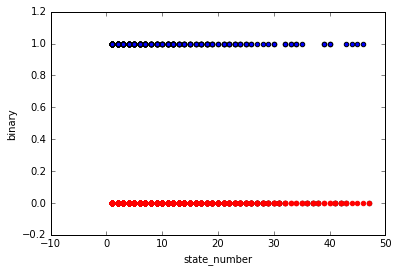

In [343]:
matplotlib.pyplot.scatter(X, y)
matplotlib.pyplot.scatter(X, predictions, color='red')
matplotlib.pyplot.xlabel("state_number")
matplotlib.pyplot.ylabel("binary")

In [344]:
df1.binary.value_counts()

0    487
1    399
Name: binary, dtype: int64

# Method 2

In [358]:
states = pandas.get_dummies(df2['states'])


In [359]:
states

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [428]:
X = states
y = df2['binary']  
lr2 = sklearn.linear_model.LogisticRegression(C=.01)

lr2.fit(X, y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [434]:
lr2.coef_

array([[-0.0092092 , -0.00842703,  0.01069027, -0.01061553,  0.17042309,
        -0.01061553, -0.02836011, -0.00030356,  0.00074055, -0.04819687,
         0.02787306,  0.01069027, -0.00612582, -0.01297715,  0.00994123,
        -0.01297715,  0.00607071,  0.00147385, -0.0092092 , -0.02233334,
        -0.04455177,  0.00535837,  0.00952975, -0.00907869, -0.00688544,
        -0.0092092 , -0.06506166, -0.01832798,  0.01069027, -0.05244237,
         0.00535837,  0.01069027,  0.03373502, -0.00462838, -0.00461599,
        -0.01218229, -0.02257986, -0.0092092 ,  0.00074055, -0.0092092 ,
        -0.03008318, -0.02053269, -0.0023538 , -0.00123647,  0.00535837,
         0.03010682,  0.00291906]])

In [367]:
from sklearn.cross_validation import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [373]:
lr2.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [380]:
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [406]:
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' States', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

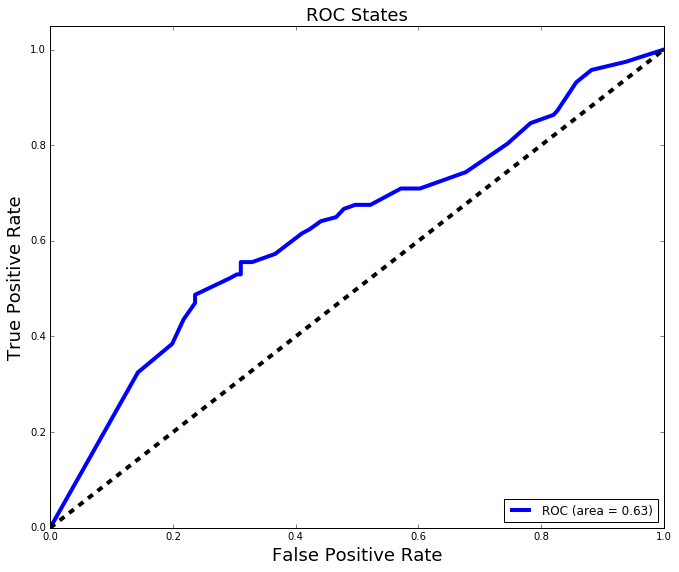

In [407]:
y_score = lr.decision_function(X_test)
plot_roc(y_test, y_score)

In [408]:
Y_pred = lr.predict(X_test)


In [409]:
accuracy_score(y_test, Y_pred)

0.63309352517985606

In [410]:
precision_score(y_test, Y_pred)

0.62295081967213117

In [411]:
recall_score(y_test, Y_pred)

0.3247863247863248

## Ridge Regression


In [419]:
from sklearn.linear_model import Ridge


clf = Ridge(alpha=1.0)
clf.fit(X, y) 


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [422]:
clf.coef_

array([-0.27798157, -0.13357789,  0.38868509, -0.04889133,  0.18201644,
       -0.04889133, -0.14091159,  0.0429155 ,  0.05535176, -0.16029347,
        0.15402661,  0.38868509, -0.01542942, -0.1808103 ,  0.06977701,
       -0.1808103 ,  0.18727073,  0.06642211, -0.27798157, -0.00184324,
       -0.10130653,  0.29151382,  0.11281138, -0.01591159, -0.03730877,
       -0.27798157, -0.19569745, -0.33357789,  0.38868509, -0.17016573,
        0.29151382,  0.38868509,  0.10449692,  0.0108258 , -0.20848618,
       -0.11485082, -0.03640662, -0.27798157,  0.05535176, -0.27798157,
       -0.215558  , -0.00384529,  0.01014918,  0.04218396,  0.29151382,
        0.13779828,  0.07380235])

In [421]:
clf.predict(X)

array([ 0.41512912,  0.41512912,  0.45915632,  0.48674937,  0.22127491,
        0.48674937,  0.57099898,  0.45915632,  0.31566583,  0.24680663,
        0.27606077,  0.41512912,  0.31566583,  0.41512912,  0.27606077,
        0.57099898,  0.23616206,  0.24680663,  0.5989888 ,  0.5989888 ,
        0.52146928,  0.45915632,  0.38056575,  0.30212155,  0.24680663,
        0.41512912,  0.5989888 ,  0.31566583,  0.5989888 ,  0.5989888 ,
        0.5989888 ,  0.36808103,  0.5989888 ,  0.41512912,  0.55477064,
        0.38056575,  0.45988787,  0.41512912,  0.31566583,  0.5989888 ,
        0.22127491,  0.36808103,  0.52146928,  0.20141436,  0.55477064,
        0.45915632,  0.13899079,  0.52978374,  0.41312707,  0.36808103,
        0.55477064,  0.23616206,  0.42779816,  0.48674937,  0.45915632,
        0.27606077,  0.45988787,  0.57099898,  0.52146928,  0.41312707,
        0.42779816,  0.40106077,  0.38056575,  0.40106077,  0.45915632,
        0.60424309,  0.42779816,  0.48674937,  0.41512912,  0.22

## Lasso Regression


In [437]:
from sklearn.linear_model import Lasso


ols = Lasso(alpha=1.0)
ols.fit(X, y) 


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [438]:
ols.coef_

array([-0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,
       -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0.,
       -0., -0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,
       -0., -0., -0., -0.,  0.,  0.,  0.,  0.])